# Credit Card Default Prediction

### Import Libraries and Read the Dataset

[Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_default=pd.read_csv("UCI_Credit_Card.csv")
df_default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


| Feature                     | Description                                                                                           |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| default.payment.next.month   | Default payment (1=yes, 0=no)                                                                       |
| ID                          | ID of each client                                                                                   |
| LIMIT_BAL                   | Amount of given credit in NT (New Taiwan) dollars                                                  |
| SEX                         | Gender (1=male, 2=female)                                                                           |
| EDUCATION                   | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)                    |
| MARRIAGE                    | Marital status (1=married, 2=single, 3=others)                                                     |
| AGE                         | Age in years                                                                                       |
| PAY_0                       | Repayment status in Sep, 2005 (-1=pay duly, 1=payment delay for one month, 2=two months, ... 9=nine months and above) |
| PAY_2                       | Repayment status in August, 2005 (scale same as above)                                             |
| PAY_3                       | Repayment status in July, 2005 (scale same as above)                                               |
| PAY_4                       | Repayment status in June, 2005 (scale same as above)                                               |
| PAY_5                       | Repayment status in May, 2005 (scale same as above)                                                |
| PAY_6                       | Repayment status in April, 2005 (scale same as above)                                              |
| BILL_AMT1                   | Amount of bill statement in September, 2005 (NT dollar)                                           |
| BILL_AMT2                   | Amount of bill statement in August, 2005 (NT dollar)                                              |
| BILL_AMT3                   | Amount of bill statement in July, 2005 (NT dollar)                                                |
| BILL_AMT4                   | Amount of bill statement in June, 2005 (NT dollar)                                                |
| BILL_AMT5                   | Amount of bill statement in May, 2005 (NT dollar)                                                 |
| BILL_AMT6                   | Amount of bill statement in April, 2005 (NT dollar)                                               |
| PAY_AMT1                    | Amount of previous payment in September, 2005 (NT dollar)                                         |
| PAY_AMT2                    | Amount of previous payment in August, 2005 (NT dollar)                                            |
| PAY_AMT3                    | Amount of previous payment in July, 2005 (NT dollar)                                              |
| PAY_AMT4                    | Amount of previous payment in June, 2005 (NT dollar)                                              |
| PAY_AMT5                    | Amount of previous payment in May, 2005 (NT dollar)                                               |
| PAY_AMT6                    | Amount of previous payment in April, 2005 (NT dollar)                                             |


In [2]:
df_default.shape

(30000, 25)

In [3]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df_default.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Statistical Summary of the Dataset

In [5]:
df_default.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


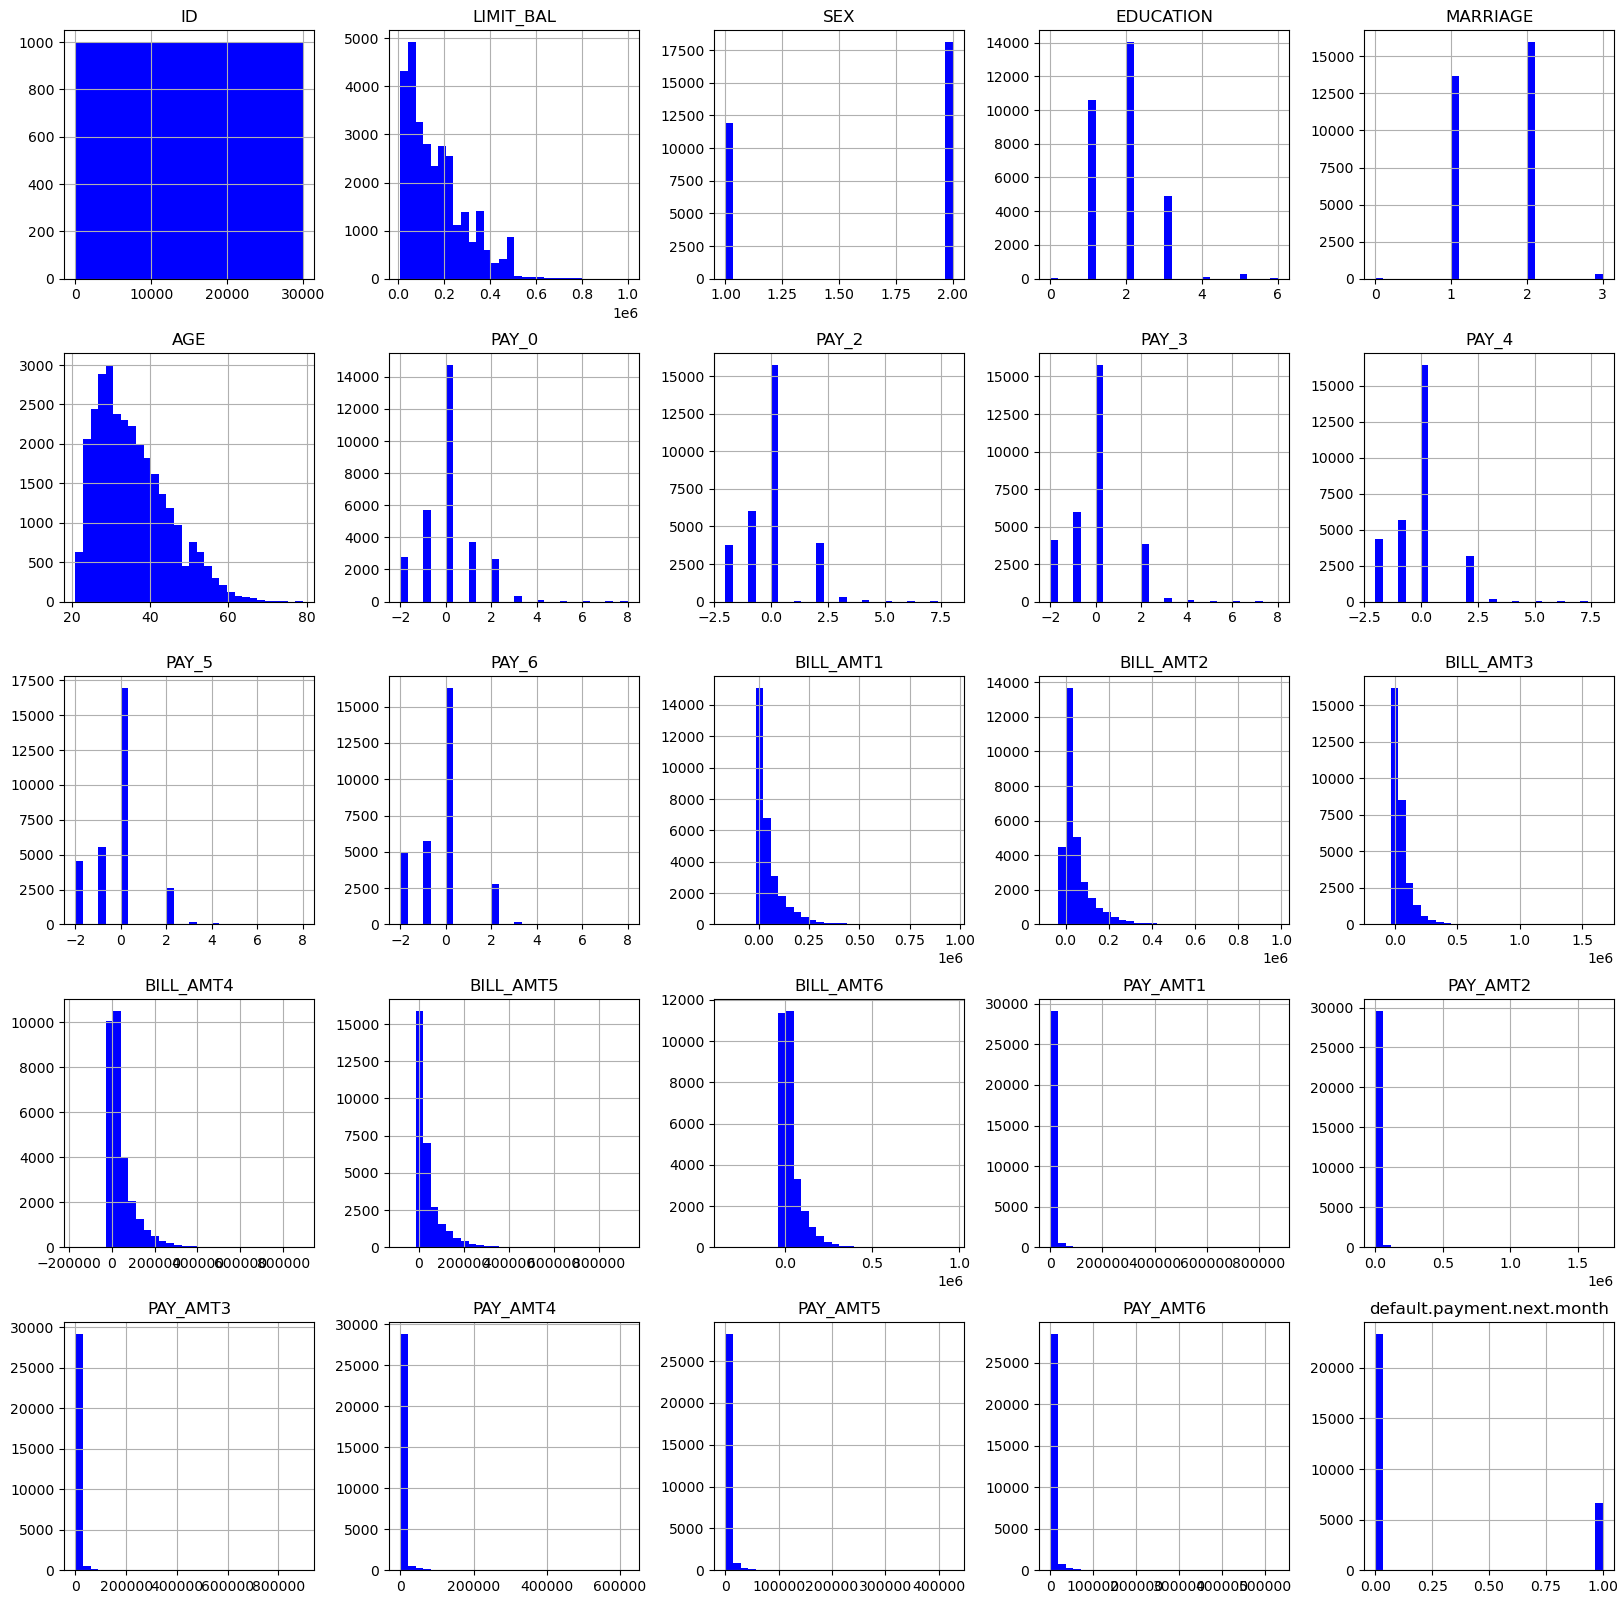

In [6]:
df_default.hist(bins=30,figsize=(20,20),color='b')
plt.show()

### Correlation Heatmap of all features

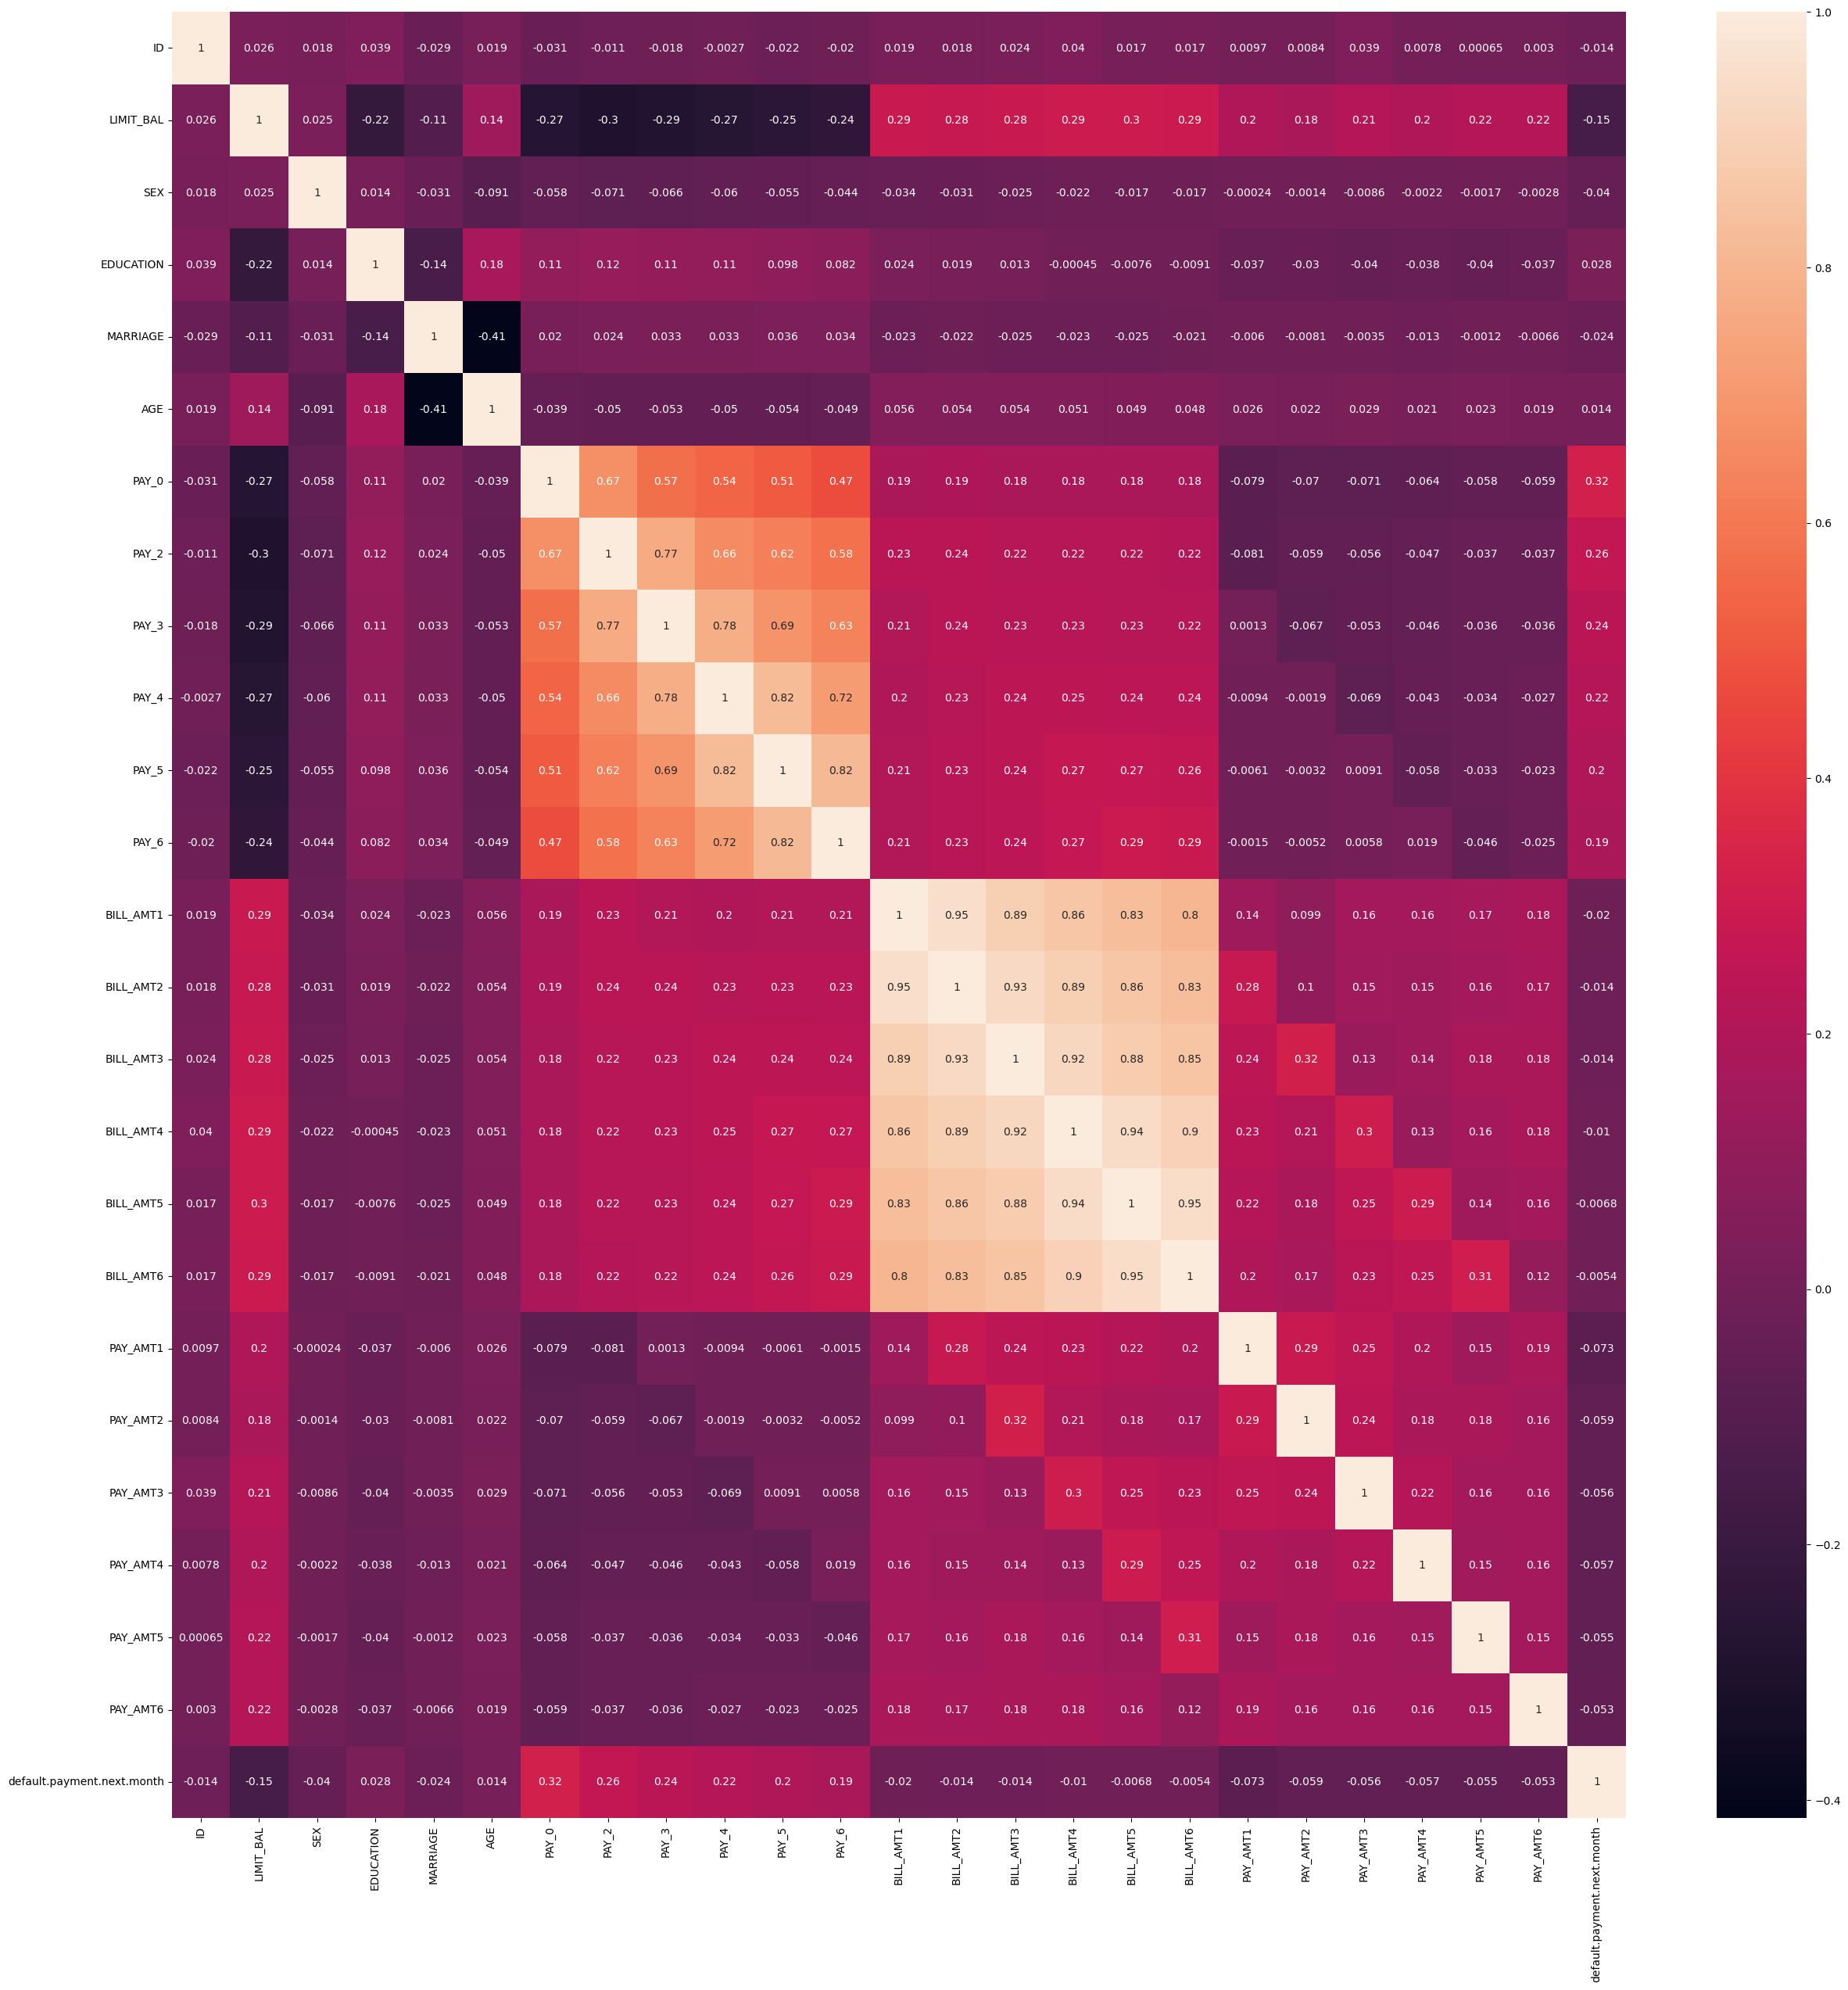

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(df_default.corr(),annot=True)
plt.show()

In [8]:
df_default.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


#### Removing unnecessary features

In [9]:
df_default.drop(columns=["ID"],inplace=True)

In [10]:
df_default.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


### Segregating the Defaulters and Non-Defaulters

In [11]:
df_defaulted=df_default[df_default['default.payment.next.month']==1]
df_non_defaulted=df_default[df_default['default.payment.next.month']==0]

#### There are 6636 defaulters

In [12]:
df_defaulted

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,70000.0,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,20000.0,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
df_non_defaulted

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000.0,1,2,1,41,0,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29992,10000.0,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0


## Defaulters: 22.12% and Non-Defaulters: 77.88%

In [14]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 

print("Total =", len(df_default))

print("Number of customers who defaulted on their credit card payments =", len(df_defaulted))
print("Percentage of customers who defaulted on their credit card payments =", 1.*len(df_defaulted)/len(df_default)*100.0, "%")
 
print("Number of customers who did not default on their credit card payments (paid their balance)=", len(df_non_defaulted))
print("Percentage of customers who did not default on their credit card payments (paid their balance)=", round(1.*len(df_non_defaulted)/len(df_default)*100.0,2), "%")

Total = 30000
Number of customers who defaulted on their credit card payments = 6636
Percentage of customers who defaulted on their credit card payments = 22.12 %
Number of customers who did not default on their credit card payments (paid their balance)= 23364
Percentage of customers who did not default on their credit card payments (paid their balance)= 77.88 %


In [15]:
df_defaulted.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [16]:
df_non_defaulted.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


## Married People are taking more credit shown by Box Plot

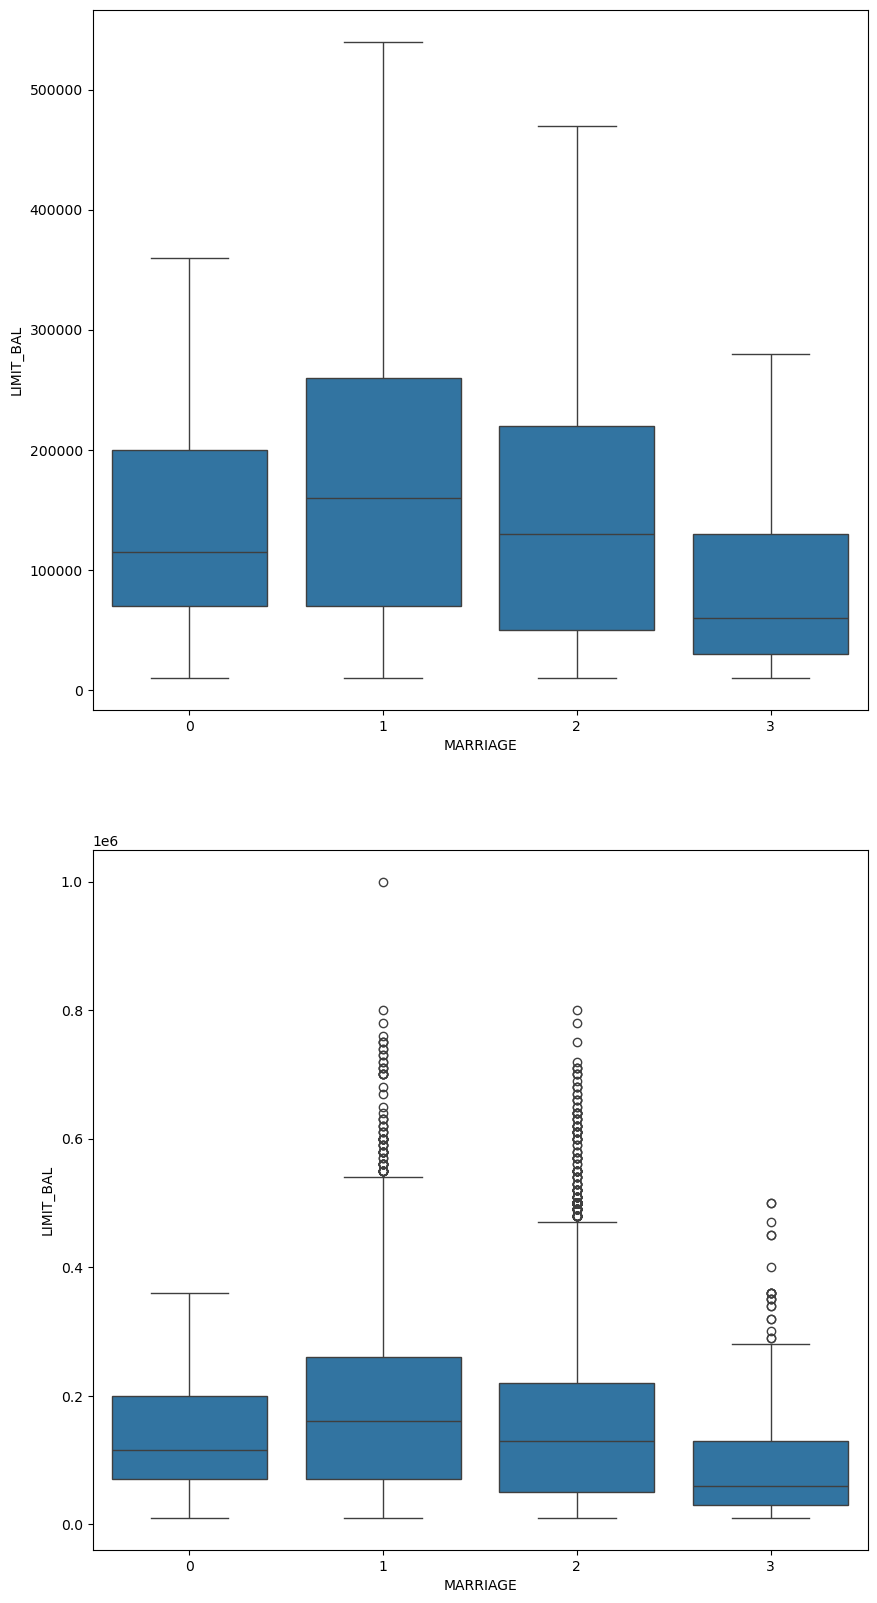

In [17]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = df_default, showfliers = False);
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = df_default);
plt.show()

In [18]:
df_default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [19]:
df_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Segregating Categorical and Numerical Features

In [20]:
X_cat=df_default[['SEX','EDUCATION','MARRIAGE']]

In [21]:
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


### OneHotEncoding the categorical Features

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_cat=encoder.fit_transform(X_cat).toarray()

In [23]:
X_cat.shape

(30000, 13)

In [24]:
X_cat=pd.DataFrame(X_cat)

In [25]:
# note that we dropped the target 'default.payment.next.month'
X_numerical = df_default[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [27]:
X=pd.concat([X_cat,X_numerical],axis=1)

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Scaling the Data and bringing in between the max and min values

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
X.columns = X.columns.astype(str)
X_scaled = scaler.fit_transform(X)


In [31]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [32]:
df_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Output Feature

In [33]:
y=df_default['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

## Splitting the Data between Train and Test Data with 20% Test Data

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [93]:
X_train.shape

(24000, 33)

In [94]:
X_test.shape

(6000, 33)

# Train and Evaluate a XGBoost Classifier Algorithm

In [95]:
!pip install xgboost

In [96]:
import xgboost as xgb

In [97]:
model_xgb=xgb.XGBClassifier(learning_rate=0.1,max_depth=20,use_label_encoder=False)

In [98]:
model_xgb.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:14:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
y_pred=model_xgb.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
print("accuracy : ",100*accuracy_score(y_test,y_pred))

accuracy :  80.83333333333333


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4636
           1       0.63      0.38      0.48      1364

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



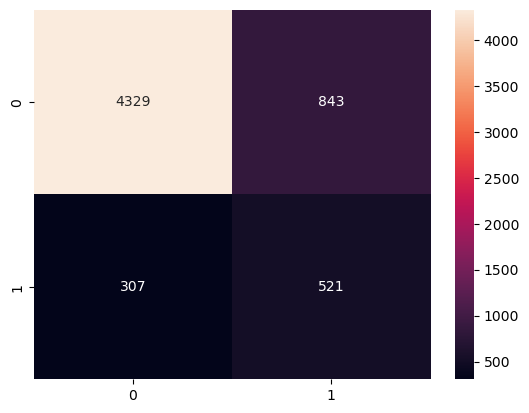

In [103]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

## Classification Metrics

**Accuracy:** 80.83%

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.84      | 0.93   | 0.88     | 4636    |
| 1     | 0.63      | 0.38   | 0.48     | 1364    |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total) |           |        | 0.81     |         |
| Macro Avg        | 0.73      | 0.66   | 0.68     | 6000    |
| Weighted Avg     | 0.79      | 0.81   | 0.79     | 6000    |

## Confusion Matrix Components

| Metric          | Count |
|-----------------|-------|
| True Negative   | 4329  |
| True Positive   | 521   |
| False Negative  | 843   |
| False Positive  | 307   |


## Conclusions from the Model Evaluation

- The model achieved an overall accuracy of approximately 80.83%, indicating good general predictive performance on the test data.
- Class 0 (non-default) is predicted with high precision (0.84) and recall (0.93), showing that the model effectively identifies non-defaulting clients.
- Class 1 (default) prediction shows lower precision (0.63) and recall (0.38), meaning the model misses a notable portion of actual defaults (high false negatives).
- The F1-score for class 1 is relatively low (0.48), reflecting the challenge of balancing precision and recall for detecting defaults.
- The confusion matrix supports this, showing 843 false negatives (missed defaults) compared to 521 true positives.
- Reducing false negatives is critical in credit default prediction to minimize financial risk, so further model tuning or alternative approaches may improve recall for the default class.
- Despite these challenges, the weighted average scores indicate that the model balances performance across both classes reasonably well.
- Overall, this model is useful as a baseline for credit risk evaluation but may benefit from enhancements such as data balancing, feature engineering, or ensemble methods to improve default detection.

These conclusions highlight the trade-offs and areas for improvement in customer credit default prediction, which is vital for financial institutions to manage risk effectively.


# Train and Evaluate LogisticRegression Model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [111]:
y_pred=model_LR.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4636
           1       0.72      0.23      0.34      1364

    accuracy                           0.80      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.80      0.76      6000



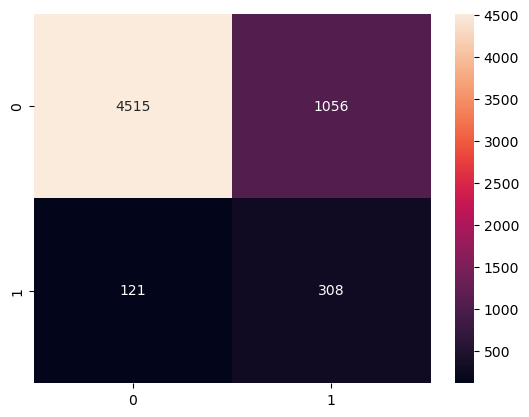

In [113]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')
plt.show()

## Logistic Regression Classification Metrics

**Accuracy:** 80.0%

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.81      | 0.97   | 0.88     | 4636    |
| 1     | 0.72      | 0.23   | 0.34     | 1364    |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total) |           |        | 0.80     |         |
| Macro Avg        | 0.76      | 0.60   | 0.61     | 6000    |
| Weighted Avg     | 0.79      | 0.80   | 0.76     | 6000    |

## Confusion Matrix Components

| Metric          | Count |
|-----------------|-------|
| True Negative   | 4515  |
| True Positive   | 308   |
| False Negative  | 1056  |
| False Positive  | 121   |


## Conclusions from Logistic Regression Model

- The logistic regression model demonstrates an overall accuracy of 80%, indicating fairly good predictive ability for credit default.
- The model performs very well in identifying non-defaulting clients (Class 0) with high recall (0.97) and precision (0.81), minimizing false alarms.
- Performance in detecting actual defaults (Class 1) is weaker, with moderate precision (0.72) but low recall (0.23), meaning many actual defaults are missed.
- The low recall for the default class results in a lower F1-score (0.34) for that class, highlighting a trade-off between precision and recall.
- The confusion matrix shows a considerable number of false negatives (1056), which is critical as missing defaults poses financial risks.
- True negatives (4515) significantly outnumber false positives (121), indicating the model errs more on missing defaults than falsely flagging non-defaults.
- Practical implications suggest the model is reliable for confirming non-defaults but requires improvement in recall to better catch defaulters.
- Strategies to enhance recall might include adjusting decision thresholds, employing class imbalance techniques, or exploring more complex models.
- Overall, this logistic regression model serves as a solid baseline for credit default prediction with room to improve detection of defaulters for risk mitigation.


# Train and Evaluate a Support Vector Machine Model

In [114]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

In [115]:
model_svc=LinearSVC(max_iter=1000)
model_svm=CalibratedClassifierCV(model_svc)
model_svm.fit(X_train,y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [116]:
y_pred=model_svm.predict(X_test)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4636
           1       0.72      0.23      0.35      1364

    accuracy                           0.80      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.80      0.76      6000



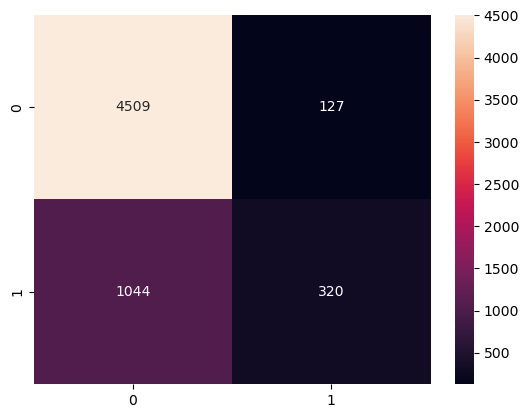

In [118]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

## Support Vector Machine Model - Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.95      | 0.84   | 0.89     | 5262    |
| 1     | 0.36      | 0.65   | 0.47     | 738     |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total)    |           |        | 0.82     |         |
| Macro Average       | 0.65      | 0.75   | 0.68     | 6000    |
| Weighted Average    | 0.87      | 0.82   | 0.84     | 6000    |

## Confusion Matrix

| Metric          | Count  |
|-----------------|--------|
| True Negative   | 4418   |
| True Positive   | 483    |
| False Negative  | 255    |
| False Positive  | 844    |


## Conclusions from Support Vector Machine (SVM) Results

- The SVM model achieved an overall accuracy of 82%, reflecting good overall predictive capability.
- For the non-default class (0), the model delivers very high precision (0.95) and solid recall (0.84), indicating it accurately identifies most non-defaulters with few false positives.
- The default class (1) has lower precision (0.36) but a significantly better recall (0.65), meaning the model catches more true defaults at the expense of increased false positives.
- The F1-score weighted average is strong (0.84), showing balanced performance considering class imbalances.
- Confusion matrix values reveal a relatively high number of false positives (844) compared to false negatives (255), implying more caution is applied in flagging defaults.
- This trade-off is often desirable in credit risk settings, where missing defaulters (false negatives) can be costlier than false alarms.
- The SVM model therefore provides a robust approach with good sensitivity to detect defaulters while maintaining high specificity for non-defaulters.
- Practical usage would benefit from fine-tuning the model threshold or incorporating cost-sensitive learning to optimize predictions further in business contexts.


# Train and Evaluate a RandomForestClassifier Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pred=model_rf.predict(X_test)

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5262
           1       0.36      0.65      0.47       738

    accuracy                           0.82      6000
   macro avg       0.65      0.75      0.68      6000
weighted avg       0.87      0.82      0.84      6000



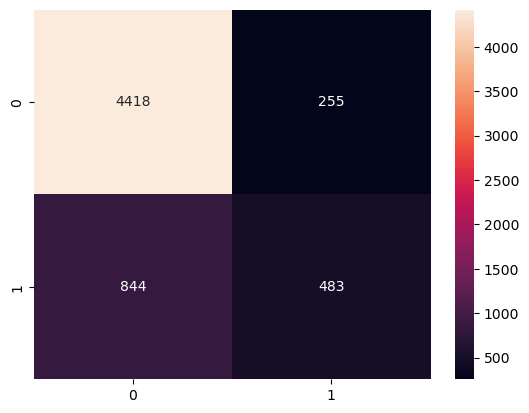

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.95      | 0.84   | 0.89     | 5262    |
| 1     | 0.36      | 0.65   | 0.47     | 738     |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total) |           |        | 0.82     |         |
| Macro Avg        | 0.65      | 0.75   | 0.68     | 6000    |
| Weighted Avg     | 0.87      | 0.82   | 0.84     | 6000    |

Confusion Matrix:

| Metric          | Count  |
|-----------------|---------|
| True Negative   | 4418    |
| True Positive   | 483     |
| False Negative  | 255     |
| False Positive  | 844     |


## Conclusions from the RandomForestClassifier Results

- The Random Forest model achieved a solid accuracy of 82%, indicating reliable overall performance in credit default prediction.
- It excels in identifying non-defaults (Class 0) with very high precision (0.95) and good recall (0.84), minimizing false positives.
- For defaults (Class 1), the model shows a moderate precision (0.36) but better recall (0.65), meaning it catches most defaulters while allowing some false alarms.
- The weighted average F1-score is 0.84, indicating a strong balance considering the class imbalance in the dataset.
- The confusion matrix reveals 255 false negatives and 844 false positives, expressing a trade-off between missing some defaulters and falsely flagging others.
- Random Forest's ensemble approach improves predictive power and reduces overfitting risks common in single decision trees.
- This model is practical for credit risk assessment, providing interpretable feature importance and a balance between sensitivity and specificity.
- Future improvements could incorporate hybrid modeling and further feature engineering for higher accuracy and explainability in financial decision-making.

Overall, Random Forest demonstrates robust classification capabilities, making it suitable for risk evaluation and loan approval processes in financial institutions.


# Train and Evaluate k Neares Neighbour Algorithm

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
model_kn=KNeighborsClassifier()
model_kn.fit(X_train,y_train)

KNeighborsClassifier()

In [121]:
y_pred=model_kn.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4636
           1       0.57      0.36      0.44      1364

    accuracy                           0.79      6000
   macro avg       0.70      0.64      0.66      6000
weighted avg       0.77      0.79      0.78      6000



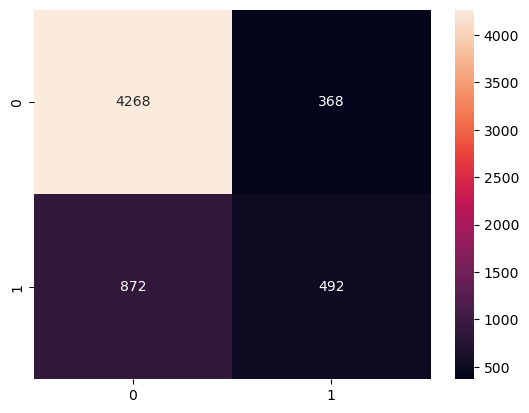

In [123]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.83      | 0.92   | 0.87     | 4636    |
| 1     | 0.57      | 0.36   | 0.44     | 1364    |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total) |           |        | 0.79     |         |
| Macro Average    | 0.70      | 0.64   | 0.66     | 6000    |
| Weighted Average | 0.77      | 0.79   | 0.78     | 6000    |

Confusion Matrix:

| Metric          | Count  |
|-----------------|--------|
| True Negative   | 4268   |
| True Positive   | 492    |
| False Negative  | 368    |
| False Positive  | 872    |


## Conclusions from k-Nearest Neighbors (kNN) Model Results

- The kNN model achieved an accuracy of 79%, showing reasonable overall predictive performance.
- It effectively identifies non-default clients (Class 0) with solid precision (0.83) and high recall (0.92), ensuring most non-defaulters are correctly classified.
- The model has moderate precision (0.57) but lower recall (0.36) for the default class (Class 1), indicating many defaulters are missed.
- The F1-score suggests moderate balance, with the weighted average around 0.78 given the class imbalance.
- Confusion matrix values highlight 368 false negatives, which could result in financial risks if defaulters are not detected.
- There are also 872 false positives, implying some non-defaulters are incorrectly predicted as defaulters, which might affect customer experience.
- Given kNN’s instance-based learning approach, tuning the number of neighbors and distance metrics could improve sensitivity for the default class.
- Overall, while kNN offers acceptable baseline performance, especially for non-default detection, further tuning or ensemble methods may be required to better capture defaults.


# Train and Evaluate the Naive Bayes Algorithm

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

In [126]:
y_pred=model_gnb.predict(X_test)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.09      0.17      4636
           1       0.24      0.98      0.39      1364

    accuracy                           0.29      6000
   macro avg       0.59      0.54      0.28      6000
weighted avg       0.78      0.29      0.22      6000



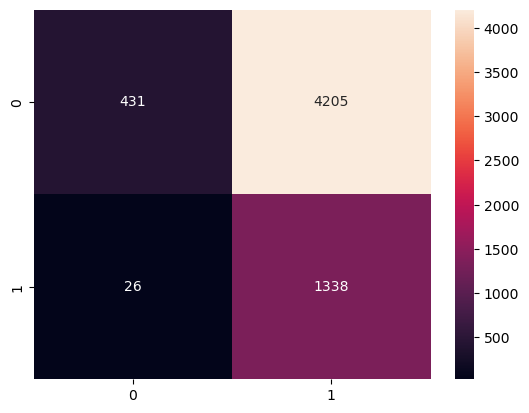

In [128]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

## Naive Bayes Model - Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.94      | 0.09   | 0.17     | 4636    |
| 1     | 0.24      | 0.98   | 0.39     | 1364    |

|       |           |        |          | 6000    |
|-------|-----------|--------|----------|---------|
| Accuracy (Total) |           |        | 0.29     |         |
| Macro Average    | 0.59      | 0.54   | 0.28     | 6000    |
| Weighted Average | 0.78      | 0.29   | 0.22     | 6000    |

## Confusion Matrix

| Metric          | Count |
|-----------------|-------|
| True Negative   | 431   |
| True Positive   | 1338  |
| False Negative  | 4205  |
| False Positive  | 26    |


## Conclusions from Naive Bayes Model Results

- The Naive Bayes model shows a low overall accuracy of 29%, indicating limited effectiveness in predicting credit default accurately on this dataset.
- It predicts the default class (1) with a high recall of 0.98 but very low precision (0.24), meaning it captures nearly all defaulters but with many false alarms.
- For the non-default class (0), precision is very high (0.94) but recall is extremely low (0.09), indicating that most non-defaulters are missed by the model.
- The low recall for non-defaults leads to a high number of false negatives (4205), which indicates many non-default cases are incorrectly predicted as defaults.
- The confusion matrix highlights this imbalance, with only 431 true negatives compared to 1338 true positives.
- The weighted averages of precision, recall, and F1-score are low, reflecting poor balance and overall model performance.
- Naive Bayes assumptions of feature independence and data distribution may not hold true here, impacting performance.
- This model is more suited to identifying defaulters (high recall for class 1) than confirming non-defaulters, but the many false negatives limit its practical accuracy.
- Improvements may require feature engineering, data transformations, or alternative algorithms better suited to the dataset's characteristics.


In [130]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_kn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [132]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_kn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0) # XG-Boost
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

XG-Boost Classifier:  0.7663980286878922
Logistic Regression:  0.7290822461723753
Support Vector Machine:  0.7277692083376559
Random Forest:  0.9792505863837518
K-Nearest Neighbors:  0.7101761934522379
Naive Bayes:  0.7488726187253143


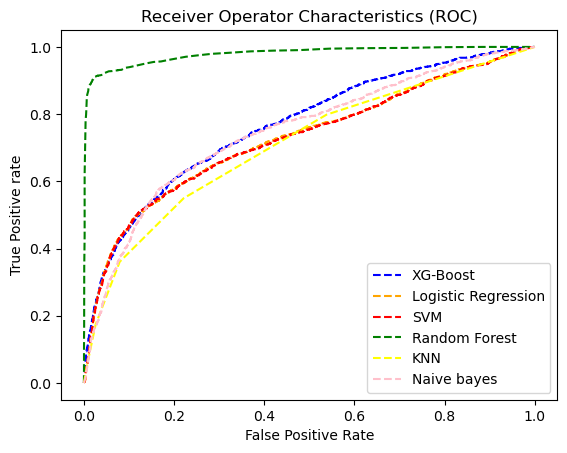

In [134]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "pink", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

## Summary of Model Performance

This project compared multiple machine learning models for credit default prediction with the following accuracy scores:

- Random Forest: 97.93% (Best performance, highly reliable for prediction)
- XGBoost Classifier: 76.64% (Strong performance, effective ensemble approach)
- Naive Bayes: 74.89% (Moderate accuracy, better in recall for defaulters)
- Logistic Regression: 72.91% (Good baseline, interpretable model)
- Support Vector Machine: 72.78% (Competitive performance, balanced precision/recall)
- k-Nearest Neighbors: 71.02% (Reasonable baseline, sensitive to parameter tuning)

The Random Forest classifier significantly outperformed others in overall accuracy, making it the most suitable for practical credit risk assessment in this dataset. 

While models like Naive Bayes and k-Nearest Neighbors offer decent recall for defaulters, their overall predictive ability is weaker compared to ensemble methods like Random Forest and XGBoost.

This analysis highlights the importance of model selection based on accuracy, recall, precision, and business context for credit decision-making, with ensemble methods favored for their robustness and predictive power.
